In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers, losses
from tensorflow.keras.callbacks import EarlyStopping, CSVLogger
from tensorflow.keras.metrics import Precision, Recall

import tensorflow as tf
tf.random.set_seed(
    42
)
import seaborn as sns

tf_chkpt_path = 'tf_Adam_new_checkpoints/'

In [4]:
from src.helperFunctions import display_model_trainTestGraphs

In [5]:
# import tensorflow as tf
# tf.config.list_physical_devices()

# Training Set

In [6]:
# Normalizing data for 8 bit
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'images/train/',
    target_size = (227,227),
    batch_size=75,
    color_mode='grayscale',
    class_mode='categorical'
)

Found 48979 images belonging to 8 classes.


# Validation Set

In [7]:
# Normalizing data for 8 bit
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    'images/val/',
    target_size = (227,227),
    batch_size=150,
    color_mode='grayscale',
    class_mode='categorical'
)

Found 14175 images belonging to 8 classes.


# Test Set

In [8]:
# Normalizing data for 8 bit
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'images/test/',
    target_size = (227,227),
    batch_size=8,
    color_mode='grayscale',
    class_mode='categorical'
)

Found 1793 images belonging to 8 classes.


# Modeling

In [9]:
epochs_to_train = 500

In [10]:
early_stop = EarlyStopping(monitor='val_loss', 
                           min_delta=1e-8,
                           verbose=1,
                           patience = 100,
                           restore_best_weights=True,
                           mode='min')

In [18]:
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.01)
    
lr_schd_cb = tf.keras.callbacks.LearningRateScheduler(scheduler)

## Model 12 - 1

In [19]:
model = models.Sequential()

model.add(layers.Conv2D(16, 3, activation='relu',
                        input_shape=(227, 227, 1)
                        ))
model.add(layers.MaxPooling2D(3, 3))

model.add(layers.Conv2D(64, 3, activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, 3, activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(256, 3, activation='relu'))
model.add(layers.Conv2D(256, 3, activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(512, 3, activation='relu'))
model.add(layers.Conv2D(512, 3, activation='relu'))
model.add(layers.MaxPooling2D(2,2))


model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(rate=0.5))


model.add(layers.Dense(8, activation='softmax'))


model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 225, 225, 16)      160       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 75, 75, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 73, 73, 64)        9280      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 128)     

Epoch 1/500
100/100 [==============================] - 14s 136ms/step - loss: 0.8751 - accuracy: 0.8107 - precision_3: 0.8121 - recall_3: 0.7905 - val_loss: 0.8898 - val_accuracy: 0.7916 - val_precision_3: 0.7916 - val_recall_3: 0.7916 - lr: 1.0000e-04
Epoch 2/500
100/100 [==============================] - 13s 132ms/step - loss: 0.7905 - accuracy: 0.8141 - precision_3: 0.8180 - recall_3: 0.8118 - val_loss: 0.8454 - val_accuracy: 0.7690 - val_precision_3: 0.7898 - val_recall_3: 0.7387 - lr: 1.0000e-04
Epoch 3/500
100/100 [==============================] - 13s 130ms/step - loss: 0.7137 - accuracy: 0.8199 - precision_3: 0.8466 - recall_3: 0.7931 - val_loss: 0.8061 - val_accuracy: 0.7917 - val_precision_3: 0.8142 - val_recall_3: 0.7411 - lr: 1.0000e-04
Epoch 4/500
100/100 [==============================] - 13s 128ms/step - loss: 0.6274 - accuracy: 0.8317 - precision_3: 0.8706 - recall_3: 0.8031 - val_loss: 0.7938 - val_accuracy: 0.7838 - val_precision_3: 0.8163 - val_recall_3: 0.7369 - lr:

100/100 [==============================] - 13s 130ms/step - loss: 0.1726 - accuracy: 0.9489 - precision_3: 0.9533 - recall_3: 0.9451 - val_loss: 0.5352 - val_accuracy: 0.8562 - val_precision_3: 0.8654 - val_recall_3: 0.8505 - lr: 7.9453e-05
Epoch 34/500
100/100 [==============================] - 13s 129ms/step - loss: 0.1888 - accuracy: 0.9420 - precision_3: 0.9477 - recall_3: 0.9353 - val_loss: 0.5099 - val_accuracy: 0.8667 - val_precision_3: 0.8750 - val_recall_3: 0.8604 - lr: 7.8663e-05
Epoch 35/500
100/100 [==============================] - 13s 130ms/step - loss: 0.1713 - accuracy: 0.9461 - precision_3: 0.9507 - recall_3: 0.9401 - val_loss: 0.4916 - val_accuracy: 0.8720 - val_precision_3: 0.8802 - val_recall_3: 0.8682 - lr: 7.7880e-05
Epoch 36/500
100/100 [==============================] - 13s 130ms/step - loss: 0.1602 - accuracy: 0.9529 - precision_3: 0.9574 - recall_3: 0.9491 - val_loss: 0.4632 - val_accuracy: 0.8614 - val_precision_3: 0.8689 - val_recall_3: 0.8562 - lr: 7.7105e-

100/100 [==============================] - 13s 129ms/step - loss: 0.0357 - accuracy: 0.9887 - precision_3: 0.9889 - recall_3: 0.9883 - val_loss: 0.7895 - val_accuracy: 0.8676 - val_precision_3: 0.8702 - val_recall_3: 0.8663 - lr: 5.7695e-05
Epoch 66/500
100/100 [==============================] - 13s 129ms/step - loss: 0.0536 - accuracy: 0.9835 - precision_3: 0.9846 - recall_3: 0.9828 - val_loss: 0.7292 - val_accuracy: 0.8643 - val_precision_3: 0.8670 - val_recall_3: 0.8624 - lr: 5.7121e-05
Epoch 67/500
100/100 [==============================] - 13s 130ms/step - loss: 0.0407 - accuracy: 0.9887 - precision_3: 0.9889 - recall_3: 0.9881 - val_loss: 0.6360 - val_accuracy: 0.8594 - val_precision_3: 0.8644 - val_recall_3: 0.8565 - lr: 5.6553e-05
Epoch 68/500
100/100 [==============================] - 13s 129ms/step - loss: 0.0331 - accuracy: 0.9900 - precision_3: 0.9905 - recall_3: 0.9895 - val_loss: 0.6505 - val_accuracy: 0.8798 - val_precision_3: 0.8823 - val_recall_3: 0.8785 - lr: 5.5990e-

100/100 [==============================] - 13s 129ms/step - loss: 0.0089 - accuracy: 0.9972 - precision_3: 0.9973 - recall_3: 0.9972 - val_loss: 0.8447 - val_accuracy: 0.8688 - val_precision_3: 0.8711 - val_recall_3: 0.8675 - lr: 4.1895e-05
Epoch 98/500
100/100 [==============================] - 13s 129ms/step - loss: 0.0089 - accuracy: 0.9969 - precision_3: 0.9969 - recall_3: 0.9969 - val_loss: 0.8274 - val_accuracy: 0.8727 - val_precision_3: 0.8744 - val_recall_3: 0.8713 - lr: 4.1478e-05
Epoch 99/500
100/100 [==============================] - 13s 129ms/step - loss: 0.0093 - accuracy: 0.9971 - precision_3: 0.9971 - recall_3: 0.9971 - val_loss: 0.9119 - val_accuracy: 0.8784 - val_precision_3: 0.8796 - val_recall_3: 0.8776 - lr: 4.1066e-05
Epoch 100/500
100/100 [==============================] - 13s 129ms/step - loss: 0.0157 - accuracy: 0.9952 - precision_3: 0.9952 - recall_3: 0.9952 - val_loss: 0.9522 - val_accuracy: 0.8735 - val_precision_3: 0.8754 - val_recall_3: 0.8725 - lr: 4.0657e

100/100 [==============================] - 13s 130ms/step - loss: 0.0156 - accuracy: 0.9956 - precision_3: 0.9956 - recall_3: 0.9956 - val_loss: 1.0753 - val_accuracy: 0.8713 - val_precision_3: 0.8730 - val_recall_3: 0.8703 - lr: 3.0422e-05
Epoch 130/500
100/100 [==============================] - 13s 131ms/step - loss: 0.0075 - accuracy: 0.9979 - precision_3: 0.9979 - recall_3: 0.9979 - val_loss: 0.9229 - val_accuracy: 0.8758 - val_precision_3: 0.8783 - val_recall_3: 0.8746 - lr: 3.0119e-05
Epoch 131/500
100/100 [==============================] - 13s 131ms/step - loss: 0.0077 - accuracy: 0.9973 - precision_3: 0.9973 - recall_3: 0.9973 - val_loss: 1.0749 - val_accuracy: 0.8780 - val_precision_3: 0.8789 - val_recall_3: 0.8775 - lr: 2.9820e-05
Epoch 132/500
100/100 [==============================] - 13s 130ms/step - loss: 0.0044 - accuracy: 0.9991 - precision_3: 0.9991 - recall_3: 0.9989 - val_loss: 0.9339 - val_accuracy: 0.8693 - val_precision_3: 0.8712 - val_recall_3: 0.8684 - lr: 2.952

INFO:tensorflow:Assets written to: tf_Adam_new_checkpoints/Model_final\assets


INFO:tensorflow:Assets written to: tf_Adam_new_checkpoints/Model_final\assets


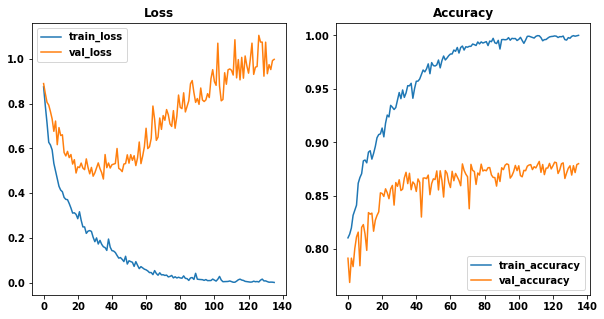

In [21]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss=losses.CategoricalCrossentropy(),
              metrics=['accuracy',
                       Precision(),
                       Recall()
                       ])


csv_logger = CSVLogger('Model_final.log', separator=',', append=False)

results = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=epochs_to_train,  # Number of epochs
                    validation_data=val_generator,
                    verbose=1,
                    callbacks=[
                        lr_schd_cb,
                        csv_logger,
                        early_stop
                    ]
                    )


results.model.save(tf_chkpt_path+'Model_final')

display_model_trainTestGraphs(results)

In [ ]:
# test = models.load_model(tf_chkpt_path+'Model_12_LR1')

In [ ]:
model.evaluate(val_generator)

## Model 12 -2 

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 225, 225, 16)      160       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 112, 112, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 110, 110, 64)      9280      
                                                                 
 conv2d_25 (Conv2D)          (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 52, 52, 128)      

Epoch 20/500
100/100 [==============================] - 23s 230ms/step - loss: 0.3014 - accuracy: 0.9105 - precision_4: 0.9197 - recall_4: 0.9029 - val_loss: 0.5399 - val_accuracy: 0.8373 - val_precision_4: 0.8557 - val_recall_4: 0.8176 - lr: 9.0484e-05
Epoch 21/500
100/100 [==============================] - 24s 237ms/step - loss: 0.2776 - accuracy: 0.9123 - precision_4: 0.9213 - recall_4: 0.9033 - val_loss: 0.5003 - val_accuracy: 0.8513 - val_precision_4: 0.8664 - val_recall_4: 0.8382 - lr: 8.9583e-05
Epoch 22/500
100/100 [==============================] - 24s 241ms/step - loss: 0.2461 - accuracy: 0.9240 - precision_4: 0.9292 - recall_4: 0.9181 - val_loss: 0.5447 - val_accuracy: 0.8430 - val_precision_4: 0.8519 - val_recall_4: 0.8360 - lr: 8.8692e-05
Epoch 23/500
100/100 [==============================] - 22s 223ms/step - loss: 0.2661 - accuracy: 0.9165 - precision_4: 0.9255 - recall_4: 0.9095 - val_loss: 0.5723 - val_accuracy: 0.8505 - val_precision_4: 0.8601 - val_recall_4: 0.8438 -

100/100 [==============================] - 21s 215ms/step - loss: 0.0550 - accuracy: 0.9815 - precision_4: 0.9824 - recall_4: 0.9804 - val_loss: 0.7038 - val_accuracy: 0.8631 - val_precision_4: 0.8658 - val_recall_4: 0.8608 - lr: 6.5705e-05
Epoch 53/500
100/100 [==============================] - 21s 214ms/step - loss: 0.0625 - accuracy: 0.9815 - precision_4: 0.9820 - recall_4: 0.9811 - val_loss: 0.6317 - val_accuracy: 0.8614 - val_precision_4: 0.8659 - val_recall_4: 0.8580 - lr: 6.5051e-05
Epoch 54/500
100/100 [==============================] - 21s 215ms/step - loss: 0.0546 - accuracy: 0.9824 - precision_4: 0.9832 - recall_4: 0.9819 - val_loss: 0.7094 - val_accuracy: 0.8688 - val_precision_4: 0.8709 - val_recall_4: 0.8667 - lr: 6.4404e-05
Epoch 55/500
100/100 [==============================] - 21s 215ms/step - loss: 0.0497 - accuracy: 0.9848 - precision_4: 0.9858 - recall_4: 0.9844 - val_loss: 0.7028 - val_accuracy: 0.8507 - val_precision_4: 0.8550 - val_recall_4: 0.8471 - lr: 6.3763e-

100/100 [==============================] - 21s 215ms/step - loss: 0.0113 - accuracy: 0.9968 - precision_4: 0.9969 - recall_4: 0.9964 - val_loss: 0.9485 - val_accuracy: 0.8799 - val_precision_4: 0.8809 - val_recall_4: 0.8790 - lr: 4.7711e-05
Epoch 85/500
100/100 [==============================] - 21s 214ms/step - loss: 0.0169 - accuracy: 0.9952 - precision_4: 0.9953 - recall_4: 0.9949 - val_loss: 1.0296 - val_accuracy: 0.8768 - val_precision_4: 0.8779 - val_recall_4: 0.8762 - lr: 4.7237e-05
Epoch 86/500
100/100 [==============================] - 21s 215ms/step - loss: 0.0098 - accuracy: 0.9968 - precision_4: 0.9971 - recall_4: 0.9965 - val_loss: 0.9470 - val_accuracy: 0.8693 - val_precision_4: 0.8711 - val_recall_4: 0.8691 - lr: 4.6767e-05
Epoch 87/500
100/100 [==============================] - 21s 215ms/step - loss: 0.0081 - accuracy: 0.9973 - precision_4: 0.9975 - recall_4: 0.9971 - val_loss: 1.2268 - val_accuracy: 0.8737 - val_precision_4: 0.8744 - val_recall_4: 0.8732 - lr: 4.6301e-

100/100 [==============================] - 21s 215ms/step - loss: 0.0068 - accuracy: 0.9989 - precision_4: 0.9991 - recall_4: 0.9989 - val_loss: 1.2007 - val_accuracy: 0.8654 - val_precision_4: 0.8666 - val_recall_4: 0.8649 - lr: 3.4646e-05
Epoch 117/500
100/100 [==============================] - 21s 215ms/step - loss: 0.0022 - accuracy: 0.9996 - precision_4: 0.9996 - recall_4: 0.9996 - val_loss: 1.3760 - val_accuracy: 0.8751 - val_precision_4: 0.8756 - val_recall_4: 0.8748 - lr: 3.4301e-05
Epoch 118/500
100/100 [==============================] - 21s 215ms/step - loss: 0.0054 - accuracy: 0.9983 - precision_4: 0.9983 - recall_4: 0.9983 - val_loss: 1.2133 - val_accuracy: 0.8779 - val_precision_4: 0.8786 - val_recall_4: 0.8775 - lr: 3.3960e-05
Epoch 119/500
100/100 [==============================] - 21s 215ms/step - loss: 0.0050 - accuracy: 0.9985 - precision_4: 0.9985 - recall_4: 0.9985 - val_loss: 1.1627 - val_accuracy: 0.8721 - val_precision_4: 0.8731 - val_recall_4: 0.8714 - lr: 3.362

INFO:tensorflow:Assets written to: tf_Adam_new_checkpoints/Model_final2\assets


INFO:tensorflow:Assets written to: tf_Adam_new_checkpoints/Model_final2\assets


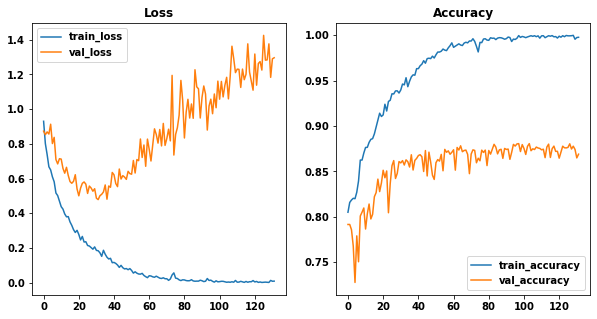

In [22]:
model = models.Sequential()

model.add(layers.Conv2D(16, 3, activation='relu',
                        input_shape=(227, 227, 1)
                        ))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, 3, activation='relu'))
model.add(layers.Conv2D(64, 3, activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, 3, activation='relu'))
model.add(layers.Conv2D(128, 3, activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(256, 3, activation='relu'))
model.add(layers.Conv2D(256, 3, activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(512, 3, activation='relu'))
model.add(layers.Conv2D(512, 3, activation='relu'))
model.add(layers.MaxPooling2D(2,2))


model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(rate=0.5))


model.add(layers.Dense(8, activation='softmax'))


model.summary()

model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss=losses.CategoricalCrossentropy(),
              metrics=['accuracy',
                       Precision(),
                       Recall()
                       ])


csv_logger = CSVLogger('Model_final2.log', separator=',', append=False)

results = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=epochs_to_train,  # Number of epochs
                    validation_data=val_generator,
                    verbose=1,
                    callbacks=[
                        lr_schd_cb,
                        csv_logger,
                        early_stop
                    ]
                    )


results.model.save(tf_chkpt_path+'Model_final2')

display_model_trainTestGraphs(results)

# Model 9 -1 

In [32]:
def scheduler(epoch, lr):
    if epoch < 20:
        return lr
    else:
        return lr*0.8
    
lr_schd_third_cb = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [33]:
model = models.Sequential()

model.add(layers.Conv2D(filters=16,
                       kernel_size=3,
                       activation='relu',
                       input_shape=(227,227,1)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, 3, activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, 3, activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(256, 3, activation='relu'))
model.add(layers.Conv2D(256, 3, activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(512, 3, activation='relu'))
model.add(layers.Conv2D(512, 3, activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Dropout(rate=0.3))

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(8, activation='softmax'))


model.summary()


model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss=losses.CategoricalCrossentropy(),
              metrics=['accuracy',
                       Precision(),
                       Recall()
                       ])

csv_logger = CSVLogger('Model_final3.log', separator=',', append=False)

results = model.fit(train_generator,
                    steps_per_epoch=200,
                    epochs=epochs_to_train,  # Number of epochs
                    validation_data=val_generator,
                    verbose=1,
                    callbacks=[
                        lr_schd_third_cb,
                        csv_logger,
                        early_stop
                    ]
                    )


results.model.save(tf_chkpt_path+'Model_final3')

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_67 (Conv2D)          (None, 225, 225, 16)      160       
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 112, 112, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_68 (Conv2D)          (None, 110, 110, 64)      9280      
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 55, 55, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_69 (Conv2D)          (None, 53, 53, 128)       73856     
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 26, 26, 128)    

Epoch 21/500
200/200 [==============================] - 26s 129ms/step - loss: 0.2065 - accuracy: 0.9366 - precision_10: 0.9422 - recall_10: 0.9309 - val_loss: 0.4776 - val_accuracy: 0.8633 - val_precision_10: 0.8762 - val_recall_10: 0.8575 - lr: 8.0000e-05
Epoch 22/500
200/200 [==============================] - 26s 131ms/step - loss: 0.1951 - accuracy: 0.9403 - precision_10: 0.9444 - recall_10: 0.9361 - val_loss: 0.4958 - val_accuracy: 0.8577 - val_precision_10: 0.8664 - val_recall_10: 0.8513 - lr: 6.4000e-05
Epoch 23/500
200/200 [==============================] - 26s 131ms/step - loss: 0.1742 - accuracy: 0.9455 - precision_10: 0.9489 - recall_10: 0.9413 - val_loss: 0.5096 - val_accuracy: 0.8621 - val_precision_10: 0.8734 - val_recall_10: 0.8561 - lr: 5.1200e-05
Epoch 24/500
200/200 [==============================] - 26s 130ms/step - loss: 0.1677 - accuracy: 0.9476 - precision_10: 0.9512 - recall_10: 0.9438 - val_loss: 0.4866 - val_accuracy: 0.8726 - val_precision_10: 0.8817 - val_rec

Epoch 53/500
200/200 [==============================] - 26s 130ms/step - loss: 0.1141 - accuracy: 0.9635 - precision_10: 0.9652 - recall_10: 0.9617 - val_loss: 0.4772 - val_accuracy: 0.8742 - val_precision_10: 0.8802 - val_recall_10: 0.8710 - lr: 6.3383e-08
Epoch 54/500
200/200 [==============================] - 26s 131ms/step - loss: 0.1133 - accuracy: 0.9640 - precision_10: 0.9665 - recall_10: 0.9617 - val_loss: 0.4770 - val_accuracy: 0.8744 - val_precision_10: 0.8802 - val_recall_10: 0.8710 - lr: 5.0706e-08
Epoch 55/500
200/200 [==============================] - 26s 130ms/step - loss: 0.1213 - accuracy: 0.9615 - precision_10: 0.9635 - recall_10: 0.9591 - val_loss: 0.4769 - val_accuracy: 0.8741 - val_precision_10: 0.8802 - val_recall_10: 0.8710 - lr: 4.0565e-08
Epoch 56/500
200/200 [==============================] - 26s 131ms/step - loss: 0.1168 - accuracy: 0.9620 - precision_10: 0.9643 - recall_10: 0.9597 - val_loss: 0.4768 - val_accuracy: 0.8740 - val_precision_10: 0.8804 - val_rec

Epoch 85/500
200/200 [==============================] - 27s 133ms/step - loss: 0.1166 - accuracy: 0.9630 - precision_10: 0.9646 - recall_10: 0.9612 - val_loss: 0.4770 - val_accuracy: 0.8744 - val_precision_10: 0.8802 - val_recall_10: 0.8710 - lr: 5.0217e-11
Epoch 86/500
200/200 [==============================] - 26s 131ms/step - loss: 0.1101 - accuracy: 0.9659 - precision_10: 0.9670 - recall_10: 0.9641 - val_loss: 0.4770 - val_accuracy: 0.8744 - val_precision_10: 0.8802 - val_recall_10: 0.8710 - lr: 4.0173e-11
Epoch 87/500
200/200 [==============================] - 26s 130ms/step - loss: 0.1106 - accuracy: 0.9651 - precision_10: 0.9666 - recall_10: 0.9633 - val_loss: 0.4770 - val_accuracy: 0.8744 - val_precision_10: 0.8802 - val_recall_10: 0.8710 - lr: 3.2139e-11
Epoch 88/500
200/200 [==============================] - 27s 133ms/step - loss: 0.1149 - accuracy: 0.9629 - precision_10: 0.9650 - recall_10: 0.9608 - val_loss: 0.4770 - val_accuracy: 0.8744 - val_precision_10: 0.8802 - val_rec

Epoch 117/500
200/200 [==============================] - 26s 130ms/step - loss: 0.1086 - accuracy: 0.9668 - precision_10: 0.9687 - recall_10: 0.9654 - val_loss: 0.4770 - val_accuracy: 0.8744 - val_precision_10: 0.8802 - val_recall_10: 0.8710 - lr: 3.9786e-14
Epoch 118/500
200/200 [==============================] - 26s 131ms/step - loss: 0.1147 - accuracy: 0.9649 - precision_10: 0.9667 - recall_10: 0.9627 - val_loss: 0.4770 - val_accuracy: 0.8744 - val_precision_10: 0.8802 - val_recall_10: 0.8710 - lr: 3.1829e-14
Epoch 119/500
200/200 [==============================] - 26s 131ms/step - loss: 0.1111 - accuracy: 0.9656 - precision_10: 0.9672 - recall_10: 0.9643 - val_loss: 0.4770 - val_accuracy: 0.8744 - val_precision_10: 0.8802 - val_recall_10: 0.8710 - lr: 2.5463e-14
Epoch 120/500
200/200 [==============================] - 26s 131ms/step - loss: 0.1121 - accuracy: 0.9634 - precision_10: 0.9659 - recall_10: 0.9617 - val_loss: 0.4770 - val_accuracy: 0.8744 - val_precision_10: 0.8802 - val

INFO:tensorflow:Assets written to: tf_Adam_new_checkpoints/Model_final3\assets


INFO:tensorflow:Assets written to: tf_Adam_new_checkpoints/Model_final3\assets


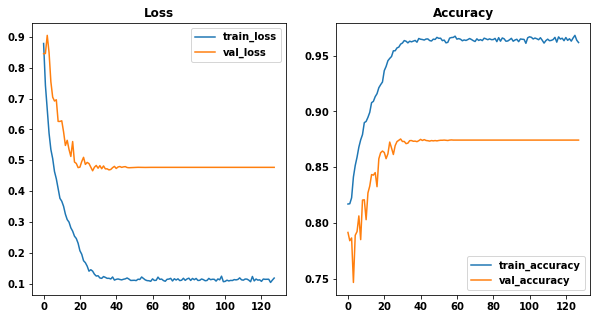

In [34]:
display_model_trainTestGraphs(results)

In [35]:
model.evaluate(test_generator)

225/225 [==============================] - 9s 38ms/step - loss: 0.4923 - accuracy: 0.8896 - precision_10: 0.8931 - recall_10: 0.8851


[0.49226462841033936,
 0.8895705342292786,
 0.8930782079696655,
 0.8851087689399719]